# COMP5328 - Advanced Machine Learning

## Tutorial - Learning with Noisy Data

**Semester 2, 2025**

**Objectives:**

* To develop linear regression with noisy data.
* To understand the robustness of different loss functions to noisy data.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "week8_tutorial.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "week8_tutorial.ipynb" file
* Complete exercises in "week8_tutorial.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Tongliang Liu

## 1. Linear Regression

Introduction to linear regression and least square criterion.

**Advertising Example:**
* Let $X$ and $Y$ be the variables of TV advertising budget and product sales, respectively. $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ be $n$ observation pairs.
* Our target is to estimate a function $f$ such that $f(X)$ can predict $Y$ very well.
* The most common approach involves minimizing the least squares criterion.
* Note that the dataset is downloaded from https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Advertising.csv.

### 1.1 Load Advertising Data

#samples = 200


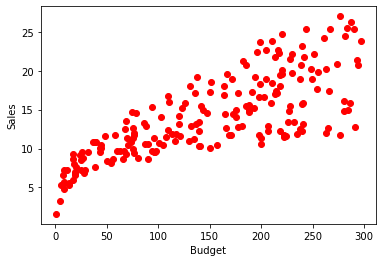

In [1]:
# Note that: csv is a library for reading and writing csv files
# matplotlib is a Python 2D plotting library, which can be easily installed by "pip install matplotlib".
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Download data.
# !wget -c https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Advertising.csv

# Load data from csv file.
budget, sales = [], []
with open('Advertising.csv', newline='') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader): 
        if i > 0 and len(row)==5:
            budget.append(float(row[1]))
            sales.append(float(row[-1]))

print('#samples = {}'.format(len(budget)))
            
# Visualize data
plt.plot(budget, sales, 'ro')
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.show()

### 1.2 Linear Regression

* We assume that $f(x)= \beta_0 x + \beta_1$, and the objective is to estimate the coefficients $\beta_0$ and $\beta_1$. We refer to $f(x)$ as linear regression model, which indicates that the model is linear with respect to the coefficients $\beta_0$ and $\beta_1$.


* Let $e_i = y_i - \hat{y}_i$ denote the difference between the target of $x_i$ and the prediction of $x_i$, i.e., $\hat{y}_i = f(x_i)$. The loss function then can be defined by the residual sum of squares (RSS), i.e.,

$$RSS = e_1^2 + e_2^2 + \cdots + e_n^2 = (y_1-\beta_0 x_1-\beta_1)^2 + \cdots + (y_n-\beta_0 x_n-\beta_1)^2.$$

* We minimize the loss function by using **gradient descent method**, and the gradient can be evaluated as follows:
$$\frac{\partial RSS}{\partial \beta_0} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1)x_i,$$
$$\frac{\partial RSS}{\partial \beta_1} = -2\sum_{i=1}^n (y_i-\beta_0 x_i - \beta_1).$$

* **Hint**: $\mathbf{\beta} = [0.0475,7.03]^{\top}$.

In [2]:
import random

# Prepare data.
x = budget[:]
y = sales[:]

print(len(x), len(y))

# Initialize beta_0, beta_1.
# beta_0, beta_1 = random.random(), randoom.random()
beta_0 = 0.1 * random.random() 
beta_1 = 5.0 * random.random() 
print(beta_0, beta_1)

# Learning rate.
lr = 1e-5  

# Maximum number of iterations.
max_iter = 2000000 

# Criterion for early stop. 
eps = 1e-8

# Print frequency.
print_freq = 50000


for i in range(max_iter):

    # compute the gradient.
    res = [(yi - beta_0*xi - beta_1) for xi, yi in zip(x,y)]
    grad_beta_0 = -2 * sum([res_i*xi for res_i, xi in zip(res, x)])
    grad_beta_1 = -2 * sum(res) 
    
    # average gradient.
    grad_beta_0 /= len(x)
    grad_beta_1 /= len(x)
                                                
    # update coefficient.
    beta_0 -= lr * grad_beta_0
    beta_1 -= lr * grad_beta_1
    
    loss = sum([r**2 for r in res])**0.5 / len(x)
    if i % print_freq == 0:
        print('Iteration {}({:.0f}%): loss={:.4f}, beta = [ {:.4f}, {:.4f}]'.format(
            i, 100*(i / max_iter), loss, beta_0, beta_1))
    
    # early stop.
    if (grad_beta_0**2 + grad_beta_1**2)**0.5 <= eps:
        break 
    
print(beta_0, beta_1)


200 200
0.0994783815433565 3.1196915611202156
Iteration 0(0%): loss=0.4700, beta = [ 0.0809, 3.1196]
Iteration 50000(2%): loss=0.2535, beta = [ 0.0630, 3.9951]
Iteration 100000(5%): loss=0.2441, beta = [ 0.0595, 4.6747]
Iteration 150000(8%): loss=0.2383, beta = [ 0.0568, 5.2023]
Iteration 200000(10%): loss=0.2348, beta = [ 0.0548, 5.6118]
Iteration 250000(12%): loss=0.2326, beta = [ 0.0531, 5.9297]
Iteration 300000(15%): loss=0.2313, beta = [ 0.0519, 6.1765]
Iteration 350000(18%): loss=0.2305, beta = [ 0.0509, 6.3681]
Iteration 400000(20%): loss=0.2300, beta = [ 0.0502, 6.5167]
Iteration 450000(22%): loss=0.2297, beta = [ 0.0496, 6.6322]
Iteration 500000(25%): loss=0.2295, beta = [ 0.0491, 6.7218]
Iteration 550000(28%): loss=0.2294, beta = [ 0.0488, 6.7913]
Iteration 600000(30%): loss=0.2294, beta = [ 0.0485, 6.8453]
Iteration 650000(32%): loss=0.2293, beta = [ 0.0483, 6.8872]
Iteration 700000(35%): loss=0.2293, beta = [ 0.0481, 6.9197]
Iteration 750000(38%): loss=0.2293, beta = [ 0.04

### 1.3 Linear Regression (Matrix Form)

* Let $\mathbf{x}$ denote the augmented matrix, i.e.,  
$$ \mathbf{x} = 
\begin{bmatrix}
    x_1       & x_2 & x_3 & \dots & x_n \\
    1       & 1 & 1 & \dots & 1
\end{bmatrix}^{\top}
$$
* Let $$\mathbf{y} = [y_1,\cdots,y_n]^{\top}, ~\text{and}~ \mathbf{\beta} = [\beta_0,\beta_1]^{\top}.$$

* We have
$$\hat{\mathbf{y}} = f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{\beta}.$$
* The loss function, i.e., the residual sum of squares (RSS), then is defined as follows, 
$$RSS = \|\mathbf{y}-\hat{\mathbf{y}}\|_2^2=\|\mathbf{y}- \mathbf{x}\cdot\mathbf{\beta}\|_2^2,$$ 
where $\|\cdot\|_2$ is $l_2$-norm of a vector.


* The gradient can be evaluated as follows:
$$\frac{\partial RSS}{\partial \beta} = -2 * \mathbf{x}^\top \cdot (\mathbf{y} - \mathbf{x} \cdot \mathbf{\beta}) $$


In [3]:
import numpy as np
import numpy.linalg as lng

# Prepare augmented matrix.
x = np.array([budget[:], [1]*len(budget)]).T
y = np.array(sales[:])
print(x.shape, y.shape)

# Initialize beta.
beta = np.random.rand(2)
beta *= np.array([0.1, 5.0])
print(beta)

# Learning rate.
lr = 1e-5  

# Maximum number of iterations.
max_iter = 2000000 

# Criterion for early stop. 
eps = 1e-8

# Print frequency.
print_freq = 50000


for i in range(max_iter):
    
    # compute the gradient.
    grad = -2 * x.T.dot(y - np.dot(x, beta))
    
    # average gradient.
    grad /= len(x)
                                             
    # update coefficient.
    beta -= lr * grad
    
    loss = lng.norm(y-np.dot(x,beta)) / len(x)
    if i % print_freq == 0:
        print('Iteration {}({:.0f}%): loss={:.4f}, beta=[{:.4f}, {:.4f}]'.format(
            i, 100*(i / max_iter), loss, *list(beta)))
    
    # early stop.
    if lng.norm(grad) <= eps:
        break 
    
print(beta)

(200, 2) (200,)
[0.00903583 0.09703491]
Iteration 0(0%): loss=0.5028, beta=[0.0517, 0.0973]
Iteration 50000(2%): loss=0.2988, beta=[0.0749, 1.6492]
Iteration 100000(5%): loss=0.2733, beta=[0.0688, 2.8537]
Iteration 150000(8%): loss=0.2567, beta=[0.0640, 3.7888]
Iteration 200000(10%): loss=0.2462, beta=[0.0603, 4.5146]
Iteration 250000(12%): loss=0.2396, beta=[0.0575, 5.0780]
Iteration 300000(15%): loss=0.2355, beta=[0.0552, 5.5153]
Iteration 350000(18%): loss=0.2331, beta=[0.0535, 5.8548]
Iteration 400000(20%): loss=0.2316, beta=[0.0522, 6.1183]
Iteration 450000(22%): loss=0.2307, beta=[0.0511, 6.3229]
Iteration 500000(25%): loss=0.2301, beta=[0.0503, 6.4817]
Iteration 550000(28%): loss=0.2298, beta=[0.0497, 6.6050]
Iteration 600000(30%): loss=0.2296, beta=[0.0492, 6.7006]
Iteration 650000(32%): loss=0.2295, beta=[0.0488, 6.7749]
Iteration 700000(35%): loss=0.2294, beta=[0.0486, 6.8326]
Iteration 750000(38%): loss=0.2293, beta=[0.0483, 6.8773]
Iteration 800000(40%): loss=0.2293, beta=[

## 2.  Linear Regression with Noisy Data

Compare the robustness of linear regression model on noisy data using different loss function, i.e., 
* L2-norm based loss function (see section 1 of this tutorial). 
* L1-norm based loss function.

### 2.1 Add Noise
We add some noise (outliers) to the original data.

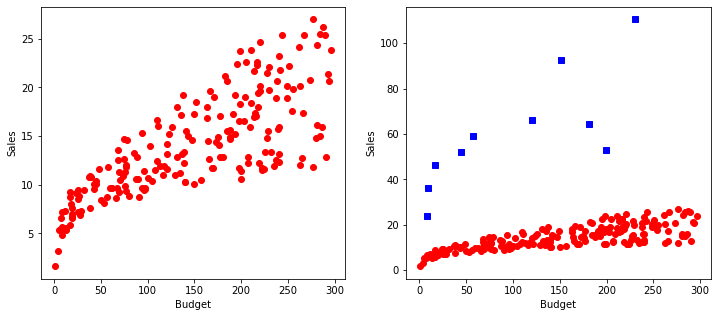

In [4]:
import numpy as np
import numpy.linalg as lng

# We always use matrix form of linear regression in the following code.

# Original data.
x = np.array(budget[:])
x = np.stack([x, np.ones(len(x))]).T  # argumented matrix.
y = np.array(sales[:])


# Add some outliers.
x_noise = np.array(budget[:])
x_noise = np.stack([x_noise, np.ones(len(x_noise))]).T # argumented matrix.
y_noise = np.array(sales[:])
y_noise[:10] *= 5 # noisy data.


# Show result.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x[:,0], y, 'ro')
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.subplot(1,2,2)
plt.plot(x_noise[10:,0], y_noise[10:], 'ro')
plt.plot(x_noise[:10,0], y_noise[:10], 'bs')
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.show()



### 2.2  The Robustness of L2-norm Based Loss.

We learn the linear regression model on noisy data using L2-norm based loss.

In [5]:
# Initialize beta.
beta = np.random.rand(2)
beta *= np.array([0.1, 5.0])
print(beta)

# Learning rate.
lr = 1e-5  

# Maximum number of iterations.
max_iter = 2000000 

# Criterion for early stop. 
eps = 1e-8

# Print frequency.
print_freq = 50000


for i in range(max_iter):
    
    # compute the gradient.
    grad = -2 * x_noise.T.dot(y_noise - np.dot(x_noise, beta))
    
    # average gradient.
    grad /= len(x_noise)
                                             
    # update coefficient.
    beta -= lr * grad
    
    loss = lng.norm(y_noise - np.dot(x_noise, beta)) / len(x_noise)
    if i % print_freq == 0:
        print('Iteration {}({:.0f}%): loss={:.4f}, beta=[{:.4f}, {:.4f}]'.format(
            i, 100*(i / max_iter), loss, *list(beta)))
    
    # early stop.
    if lng.norm(grad) <= eps:
        break 
    
print(beta)


# Test. 
mse = lng.norm(y-np.dot(x, beta)) / len(x)
print('Mean Squared Error: {}'.format(mse))


# For comparison.
beta_l2, mse_l2 = beta, mse

[0.02469941 1.10051646]
Iteration 0(0%): loss=0.9671, beta=[0.0615, 1.1008]
Iteration 50000(2%): loss=0.8876, beta=[0.0777, 3.1870]
Iteration 100000(5%): loss=0.8727, beta=[0.0694, 4.8063]
Iteration 150000(8%): loss=0.8635, beta=[0.0630, 6.0633]
Iteration 200000(10%): loss=0.8580, beta=[0.0581, 7.0390]
Iteration 250000(12%): loss=0.8546, beta=[0.0542, 7.7964]
Iteration 300000(15%): loss=0.8526, beta=[0.0513, 8.3844]
Iteration 350000(18%): loss=0.8513, beta=[0.0489, 8.8408]
Iteration 400000(20%): loss=0.8506, beta=[0.0471, 9.1950]
Iteration 450000(22%): loss=0.8501, beta=[0.0457, 9.4700]
Iteration 500000(25%): loss=0.8499, beta=[0.0447, 9.6835]
Iteration 550000(28%): loss=0.8497, beta=[0.0438, 9.8492]
Iteration 600000(30%): loss=0.8496, beta=[0.0432, 9.9778]
Iteration 650000(32%): loss=0.8495, beta=[0.0427, 10.0777]
Iteration 700000(35%): loss=0.8495, beta=[0.0423, 10.1552]
Iteration 750000(38%): loss=0.8495, beta=[0.0420, 10.2154]
Iteration 800000(40%): loss=0.8495, beta=[0.0417, 10.26

### 2.3  The Robustness of L1-norm Based Loss.

* Let $\mathbf{x}$ denote the augmented matrix, i.e.,  
$$ \mathbf{x} = 
\begin{bmatrix}
    x_1       & x_2 & x_3 & \dots & x_n \\
    1       & 1 & 1 & \dots & 1
\end{bmatrix}^{\top}
$$
* Let $$\mathbf{y} = [y_1,\cdots,y_n]^{\top}, ~\text{and}~ \mathbf{\beta} = [\beta_0,\beta_1]^{\top}.$$

* We have
$$\hat{\mathbf{y}} = f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{\beta}.$$
* The L1-norm based loss function can be defined as follows, 
$$RSS = \|\mathbf{y}-\hat{\mathbf{y}}\|_1=\|\mathbf{y}- \mathbf{x}\cdot\mathbf{\beta}\|_1,$$ 
where $\|\cdot\|_1$ is $l_1$-norm of a vector.


* The gradient can be evaluated as follows:
$$\frac{\partial RSS}{\partial \beta} = \mathbf{x}^\top \cdot \textbf{sign}(\mathbf{x} \cdot \mathbf{\beta} -\mathbf{y})$$


**NOTE**: L1-norm based loss, i.e., f(x) = |x| is **Not** differentiable at x=0. For simplicity, we use f'(0) = 0 in our example. 

In [6]:
# Initialize beta.
beta = np.random.rand(2)
beta *= np.array([0.1, 5.0])
print(beta)

# Learning rate.
lr = 5e-5 

# Maximum number of iterations.
max_iter = 5000000 

# Criterion for early stop. 
eps = 1e-8

# Print frequency.
print_freq = 50000


for i in range(max_iter):
    
    # compute the gradient.
    grad = x_noise.T.dot(np.sign(np.dot(x_noise, beta)-y_noise))
    
    # average gradient.
    grad /= len(x_noise)
                                             
    # update coefficient.
    beta -= lr * grad
    
    loss = lng.norm(y-np.dot(x_noise, beta), ord=1) / len(x_noise)
    if i % print_freq == 0:
        print('Iteration {}({:.0f}%): loss={:.4f}, beta=[{:.4f}, {:.4f}]'.format(
            i, 100*(i / max_iter), loss, *list(beta)))
    
    # early stop.
    if lng.norm(grad) <= eps:
        break 
    
print(beta)

# Test. 
mse = lng.norm(y-np.dot(x, beta)) / len(x)
print('Mean Squared Error: {}'.format(mse))


# For comparison.
beta_l1, mse_l1 = beta, mse

[0.08707852 2.42786382]
Iteration 0(0%): loss=3.5550, beta=[0.0840, 2.4279]
Iteration 50000(1%): loss=3.1018, beta=[0.0700, 3.1227]
Iteration 100000(2%): loss=2.9401, beta=[0.0676, 3.7658]
Iteration 150000(3%): loss=2.7820, beta=[0.0637, 4.3922]
Iteration 200000(4%): loss=2.6625, beta=[0.0598, 4.9407]
Iteration 250000(5%): loss=2.5919, beta=[0.0571, 5.3667]
Iteration 300000(6%): loss=2.5566, beta=[0.0552, 5.6683]
Iteration 350000(7%): loss=2.5478, beta=[0.0546, 5.8350]
Iteration 400000(8%): loss=2.5436, beta=[0.0540, 5.9455]
Iteration 450000(9%): loss=2.5408, beta=[0.0534, 6.0406]
Iteration 500000(10%): loss=2.5390, beta=[0.0531, 6.1263]
Iteration 550000(11%): loss=2.5373, beta=[0.0526, 6.1989]
Iteration 600000(12%): loss=2.5368, beta=[0.0524, 6.2440]
Iteration 650000(13%): loss=2.5363, beta=[0.0521, 6.2892]
Iteration 700000(14%): loss=2.5362, beta=[0.0519, 6.3344]
Iteration 750000(15%): loss=2.5357, beta=[0.0517, 6.3796]
Iteration 800000(16%): loss=2.5352, beta=[0.0514, 6.4247]
Iterat

MSE(L2-norm based Loss): 0.2887200513736906
MSE(L1-norm based Loss): 0.23001371762312695
MSE_L2 > MSE_L1 => L1-norm based loss is more robust to outliers.


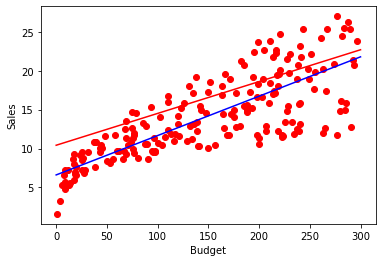

In [7]:
# Compare MSE.
print('MSE(L2-norm based Loss): {}'.format(mse_l2))
print('MSE(L1-norm based Loss): {}'.format(mse_l1))
print('MSE_L2 > MSE_L1 => L1-norm based loss is more robust to outliers.')

# Plot f(x)= x \codt \beta.
plt.plot(x[:,0], y,'ro')
plt.plot(np.array([0, 300]), np.dot(np.array([[0,1],[300,1]]), beta_l2), '-r') # by L2-norm based loss.
plt.plot(np.array([0, 300]), np.dot(np.array([[0,1],[300,1]]), beta_l1), '-b') # by L1-norm based loss.
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.show()

** Exercise 1**: Why L1-norm based loss function is more robust to the noise used in this tutorial?

**Exercise 2**: Try to add other noise and compare the robustness of different loss functions.